In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
data=pd.read_csv('train.csv')
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Dataset ka information means how many types of data format are used in this dataset
data.info()
# dataset ka statistics value display karna 
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# find the missing value in the each columns 
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# drop the columns those are store more missing values 
data=data.drop(columns=['Cabin'])

In [17]:
data['Age']=data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [21]:
data['FamilySize']=data['SibSp'] +data['Parch']+1

In [27]:
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)


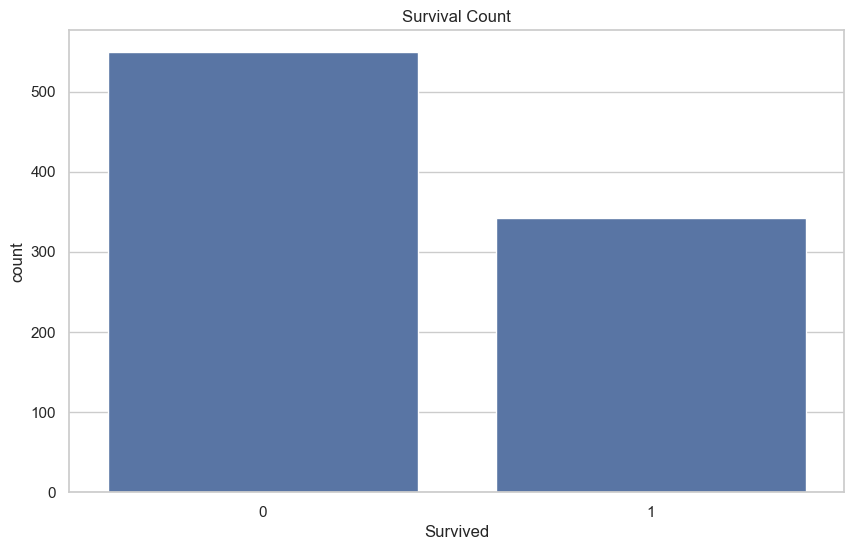

In [31]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()


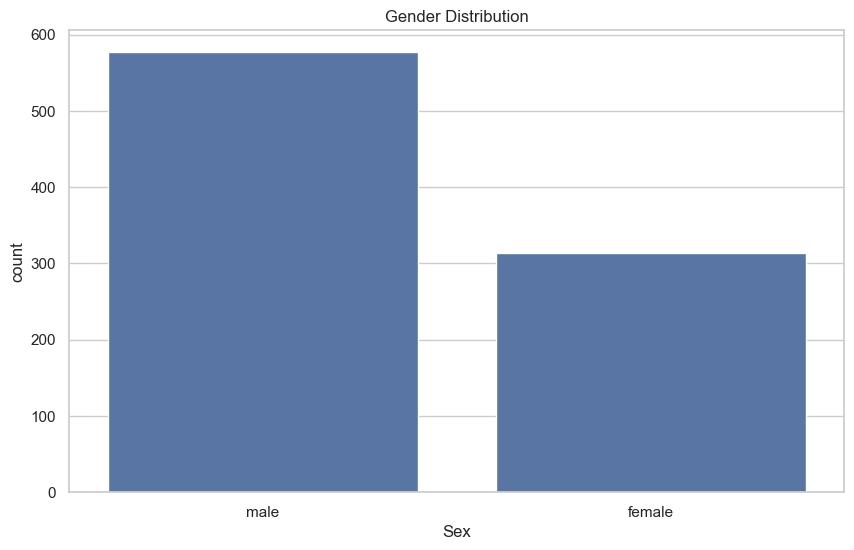

In [33]:
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution')
plt.show()


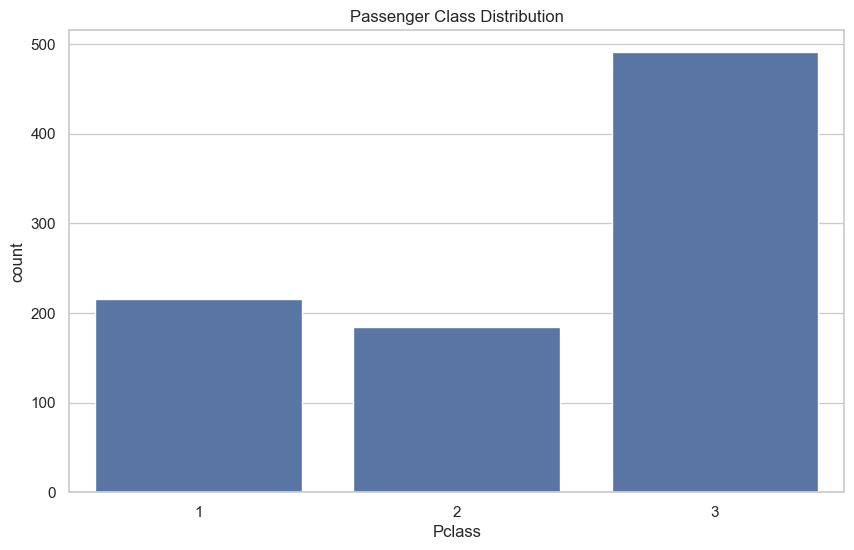

In [35]:
sns.countplot(x='Pclass', data=data)
plt.title('Passenger Class Distribution')
plt.show()


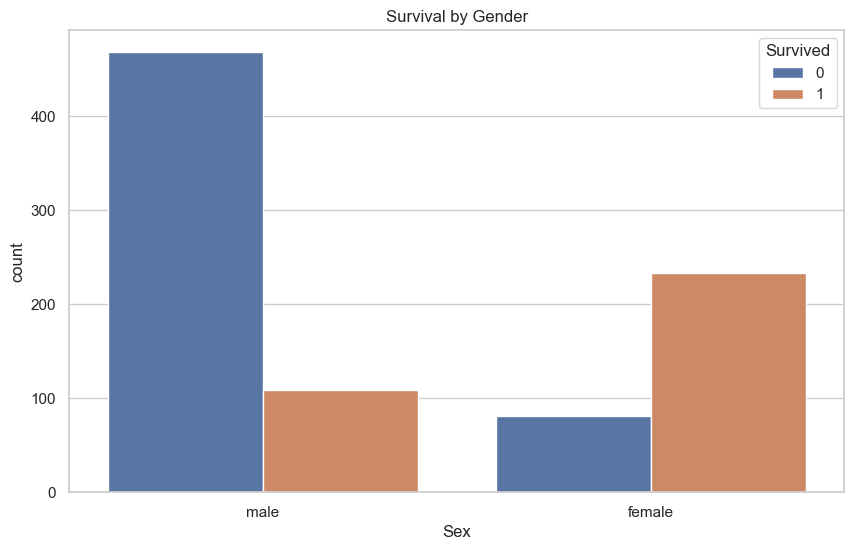

In [37]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()


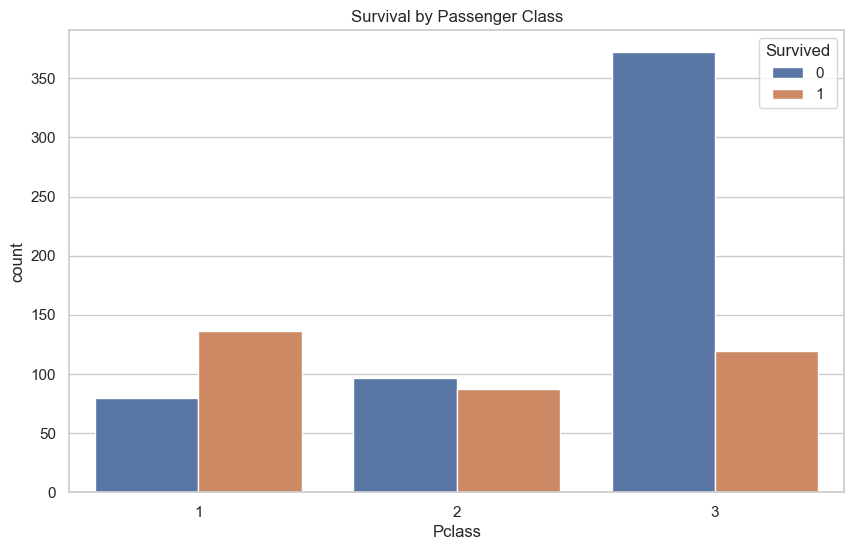

In [39]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()


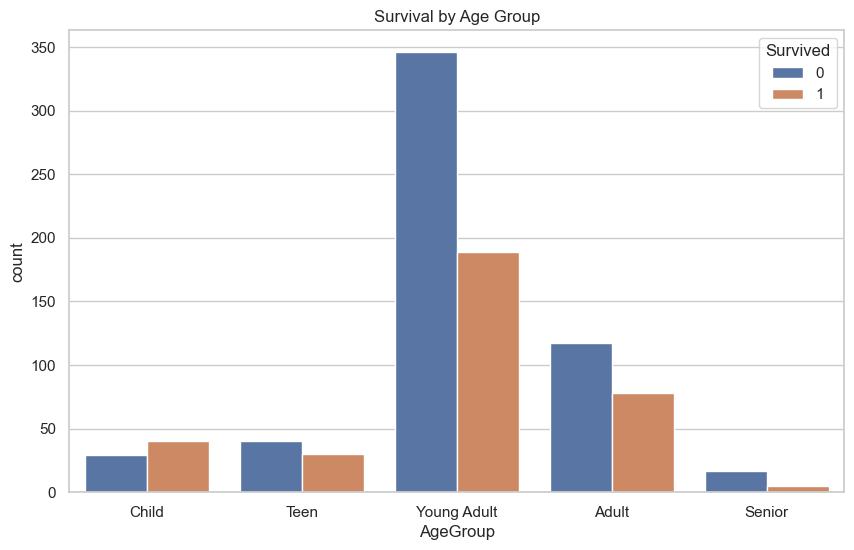

In [41]:
sns.countplot(x='AgeGroup', hue='Survived', data=data, order=labels)
plt.title('Survival by Age Group')
plt.show()


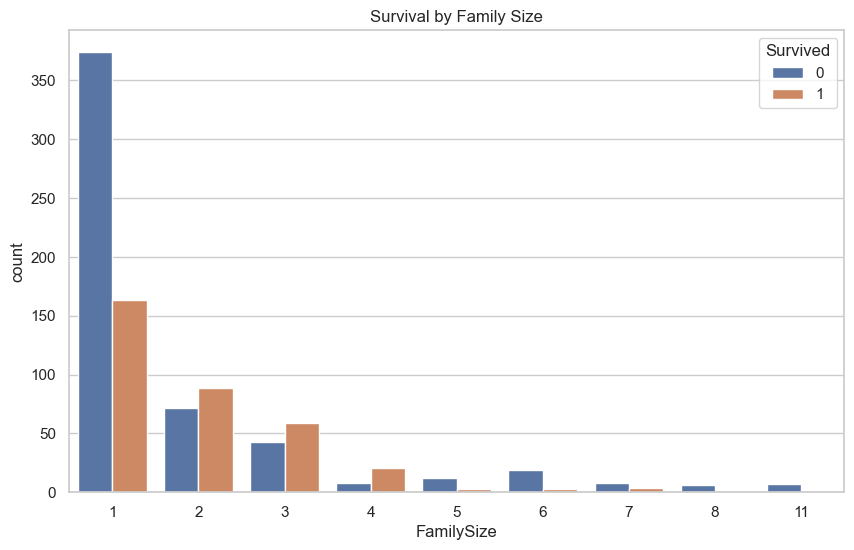

In [43]:
sns.countplot(x='FamilySize', hue='Survived', data=data)
plt.title('Survival by Family Size')
plt.show()


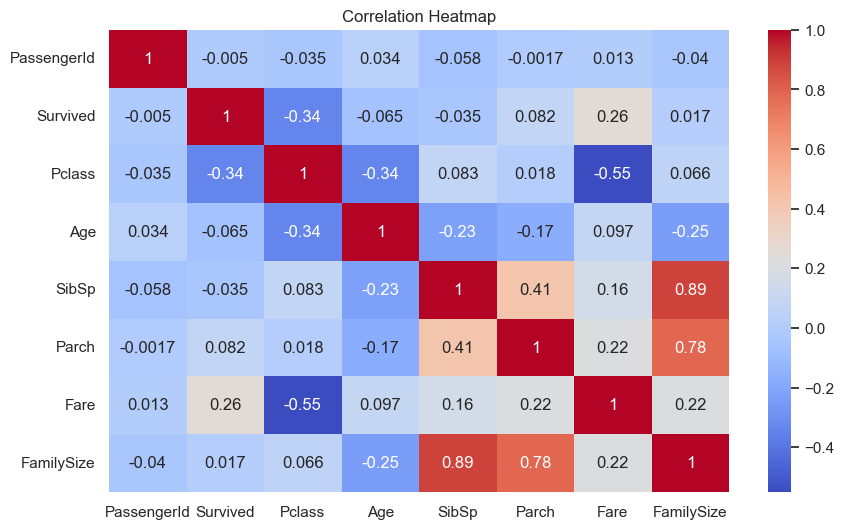

In [45]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


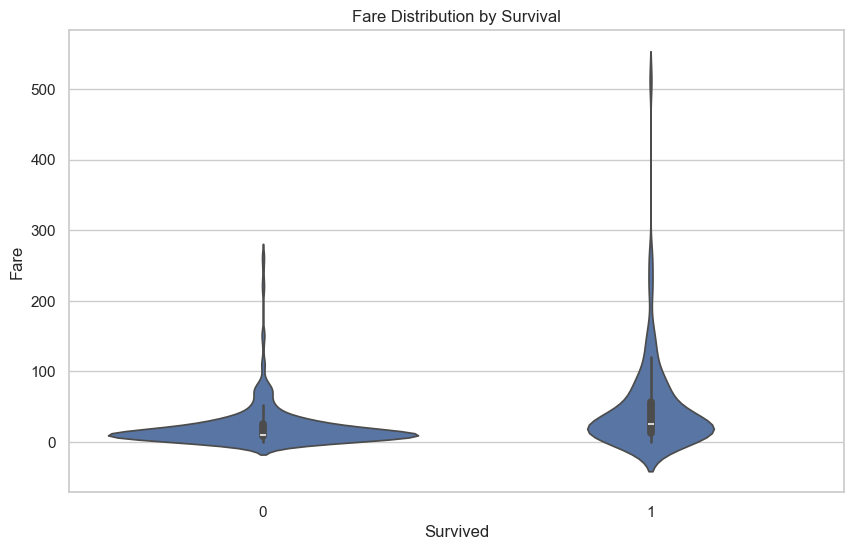

In [47]:
sns.violinplot(x='Survived', y='Fare', data=data)
plt.title('Fare Distribution by Survival')
plt.show()


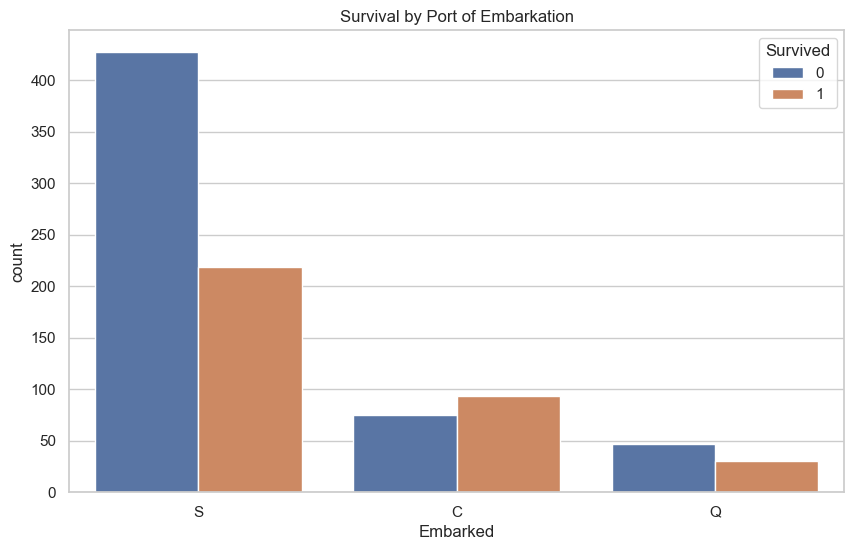

In [49]:
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival by Port of Embarkation')
plt.show()


In [51]:
data.to_csv('train_cleaned.csv', index=False)


NameError: name 'plt' is not defined